# Language Binding
---

The purpose of this notebook is for you to see as simple it is to call function or libraries from other programming languages. We show you few examples how to directly call and fully interoperate with Python and R from the Julia language, with the packages `PyCall` and `RCall`.


*References for this notebook:*
* PyCall Documentation: https://docs.juliahub.com/PyCall/GkzkC/1.92.0/
* RCall Documentation: http://juliainterop.github.io/RCall.jl/stable/
* Excelling at Julia Basics and Beyond (Huda Nassar, Jane Herriman): 
    https://github.com/xorJane/Excelling-at-Julia-Basics-and-Beyond

# Outline of this notebook


- Calling python built-in function 
- Calling python hand-written function 
- Importing python libraries
- Calling R built-in function
- Calling R hand-written function

# Let choose an easy enough function to understand calling mechanisms: `sum`

Consider the  **sum** function `sum(x)`, which computes
$$
\mathrm{sum}(x) = \sum_{i=1}^n x_i,
$$
where $n$ is the length of `x`.

In [1]:
# Generate avector of random numbers, uniform on [0,1)
a = rand(10^3);

    The expected result is 0.5 * 10^4, since the mean of each entry is 0.5

In [2]:
 sum(a)

498.53127925180104

# 1. Calling Python's built-in `sum` 

The `PyCall` package provides a Julia interface to Python:

In [3]:
# Using Pkg; Pkg.add("PyCall")
using PyCall

In [4]:
# Get the Python built-in "sum" function:
pysum = pybuiltin("sum")

PyObject <built-in function sum>

In [5]:
pysum(a)

498.53127925180075

In [6]:
# Confirm that the results of Julia and Python built in sum function are approximatly the same    
pysum(a) ≈ sum(a)

true

# 2. Calling Python hand-written `sum` function 

We can also write an easy Python code from within Julia.

### We can take an existing python function and wrap it into a julia function
_filename: python_sum.py_

```python
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
```

In [7]:
pushfirst!(PyVector(pyimport("sys")."path"), ""); #to tell pyimport search in the local directory

In [8]:
python_sum = pyimport("python_sum") # wrote a function outside julia

PyObject <module 'python_sum' from 'C:\\git\\senresearch\\quant-genetics-webinars\\2021-11-12\\python_sum.py'>

In [9]:
python_sum.py_sum(a)

498.53127925180075

### We can directly write the python function and wrap it into a julia function

In [10]:
py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""
sum_py = py"py_sum"

PyObject <function py_sum at 0x00000000483C9B80>

In [11]:
sum_py(a)

498.53127925180075

# 3. Importing Python libraries 

Here is a simple example to call Python `math` library and its sinus function `math.sin`:

In [12]:
math = pyimport("math")
math.sin(math.pi / 4) 

0.7071067811865476

## `numpy` takes advantage of  hardware "SIMD"

`numpy` is an optimized C library, callable from Python.
It may be installed within Julia as follows:

In [13]:
# using Pkg; Pkg.add("Conda")
using Conda
# In case numpy is not already installed run:
# Conda.add("numpy")

In [14]:
# We can use now the sum function from the `numpy` library
numpy_sum = pyimport("numpy")."sum"

PyObject <function sum at 0x0000000048571160>

In [15]:
numpy_sum(a)

498.53127925180104

# 4. Calling R built-in `sum` 

Since it is true that Julia still lacks the depth and scale of the R package environment, let see how to interoperate R and Julia with `RCall`.

In [16]:
# using Pkg; Pkg.add("RCall")
using RCall

We are able use directly base R function and pass arguments easily, as in the next example: 

In [17]:
# Syntax Option 1
R"sum($a)"

RObject{RealSxp}
[1] 498.5313


In [18]:
# Syntax Option 2
rcall(:sum, a)

RObject{RealSxp}
[1] 498.5313


In [19]:
sum_R = convert(Float64, rcall(:sum, a))

498.53127925180104

# 5. Calling R hand-written function

### We can directly write the R function and wrap it into a julia function.

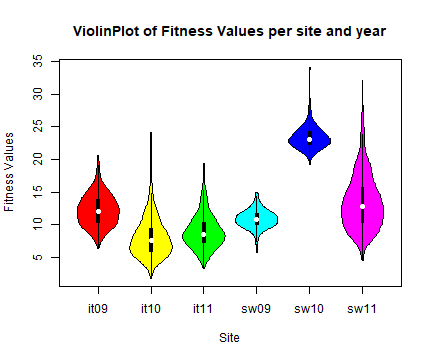

┌ Warning: RCall.jl: Loading required package: sm
│ Package 'sm', version 2.2-5.6: type help(sm) for summary information
│ Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
└ @ RCall C:\Users\Fenril-Fractal\.julia\packages\RCall\iMDW2\src\io.jl:160


In [20]:
R"""
library(vioplot); agrenViolinPlot <- function(){
agrenURL <- "https://raw.githubusercontent.com/sens/smalldata/master/arabidopsis/agren2013.csv"
agren <- read.csv(agrenURL); agrenFit <- agren[,c(1,2,3,4,5,6)]
vioplot(agrenFit, names=names(agrenFit), main = "ViolinPlot of Fitness Values per site and year", xlab ="Site", ylab =  "Fitness Values",col = rainbow(6))}
"""
R"agrenViolinPlot"();

### We can even use summary function from directly on our Julia dataframes

In [21]:
using CSV, DataFrames
agrenURL = "https://raw.githubusercontent.com/sens/smalldata/master/arabidopsis/agren2013.csv"
agren = CSV.read(download(agrenURL),DataFrame, missingstring="NA");
agren = dropmissing(agren, disallowmissing=true);

In [22]:
rcall(:summary, agren)

RObject{StrSxp}
      it09             it10             it11             sw09       
 Min.   : 6.288   Min.   : 1.774   Min.   : 3.239   Min.   : 5.664  
 1st Qu.:10.366   1st Qu.: 5.886   1st Qu.: 7.136   1st Qu.: 9.992  
 Median :12.058   Median : 7.522   Median : 8.524   Median :10.834  
 Mean   :12.222   Mean   : 8.053   Mean   : 8.910   Mean   :10.855  
 3rd Qu.:13.872   3rd Qu.: 9.457   3rd Qu.:10.325   3rd Qu.:11.713  
 Max.   :20.592   Max.   :24.176   Max.   :19.311   Max.   :15.001  
      sw10            sw11              id             flc       
 Min.   :19.23   Min.   : 4.478   Min.   :  1.0   Min.   :1.000  
 1st Qu.:22.26   1st Qu.:10.303   1st Qu.:158.8   1st Qu.:1.000  
 Median :23.08   Median :12.760   Median :316.5   Median :2.000  
 Mean   :23.37   Mean   :13.481   Mean   :326.5   Mean   :1.538  
 3rd Qu.:24.28   3rd Qu.:15.703   3rd Qu.:491.0   3rd Qu.:2.000  
 Max.   :34.13   Max.   :32.189   Max.   :700.0   Max.   :2.000  


# Summary

### Calling other languages makes Julia more productive and flexible.
### It is easy to call R and Python.
### Similar packages exists also for Java, C++ and C.